In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
from ipywidgets import interact, fixed, widgets
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
images_path = './im/'

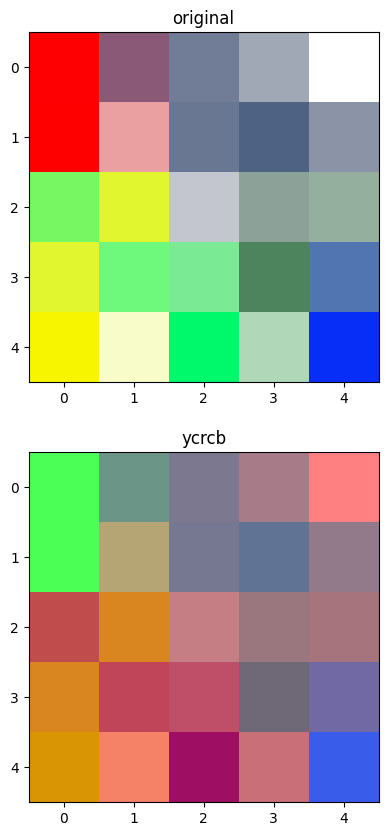

In [10]:
test = cv2.imread(images_path + 'test.jpg')
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
ycrcb = cv2.cvtColor(test, cv2.COLOR_RGB2YCrCb)

plt.subplot(211)
plt.title('original')
plt.imshow(test)

plt.subplot(212)
plt.title('ycrcb')
plt.imshow(ycrcb)
plt.show()

In [11]:
def quantizer(image, n_clusters):
    cv2.setRNGSeed(5)

    # Define parameters 
    covariance_type = 2 # 0: covariance matrix spherical. 1: covariance matrix diagonal. 2: covariance matrix generic
    n_iter = 10
    epsilon = 0.2

    # Create EM empty object
    em = cv2.ml.EM_create()

    # Set parameters
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, n_iter, epsilon)
    em.setClustersNumber(n_clusters)
    em.setCovarianceMatrixType(covariance_type)
    em.setTermCriteria(criteria)
    
    color_bands = image[:,:,1:3]

    # Flatten image
    flattened_img = color_bands.reshape((-1,2))
    flattened_img = np.float32(flattened_img)
    # Apply EM
    _, _, labels, _ = em.trainEM(flattened_img)

    # Colour resultant labels
    centers = em.getMeans()
    centers = np.uint8(centers)
    res = centers[labels.flatten()]

    # Reshape to original shape
    color_bands = res.reshape((image.shape[0:2]) + (2,))

    # Merge original first band with quantized color bands
    quantized = np.zeros(image.shape)
    quantized[:,:,0] = image[:,:,0]
    quantized[:,:,[1,2]] = color_bands

    # Cast to unsigned data dype
    quantized = np.uint8(quantized)
    
    return quantized

In [18]:
def manualYCrCb2RGB(image):
    Y = image[:,:,0]
    Cr = image[:,:,1]
    Cb = image[:,:,2]
    
    RGB = np.zeros(image.shape)
    delta = 128
    RGB[:,:,0] = Y + 1.403 * (Cr - delta)
    RGB[:,:,1] = Y - 0.714 * (Cr - delta) - 0.344 * (Cb - delta)
    RGB[:,:,2] = Y + 1.773 * (Cb - delta)
    
    return RGB

In [30]:
def normalizer256(image):
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    flat = image.reshape(-1,1)
    flat = int(flat)
    RGB = flat.reshape(image.shape)
    return RGB

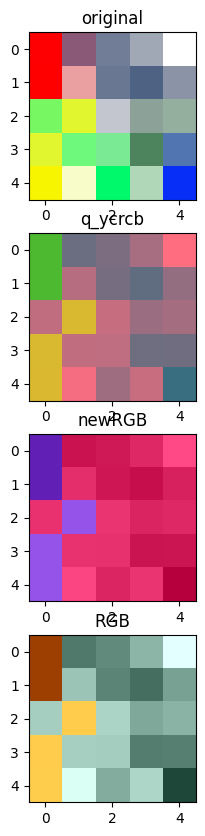

In [37]:
q_ycrcb = quantizer(ycrcb,2)
newRGB = manualYCrCb2RGB(q_ycrcb)
print(q_ycrcb[:,:,0]
RGB = cv2.cvtColor(q_ycrcb, cv2.COLOR_YCrCb2RGB)
normRGB = np.uint8(cv2.normalize(newRGB, None, 0, 255, cv2.NORM_MINMAX))

plt.subplot(411)
plt.title('original')
plt.imshow(test)

plt.subplot(412)
plt.title('q_ycrcb')
plt.imshow(q_ycrcb)

plt.subplot(413)
plt.title('newRGB')
plt.imshow(normRGB)

plt.subplot(414)
plt.title('RGB')
plt.imshow(RGB)

plt.show()